# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

The data set I will be using is the Airbnb NYC "listings" data set, where I will be predicting a numerical value of how frequent a listing receives reviews per month. The label that I will be predicting in this case is reviews_per_month. Since the data is labeled, it will be a supervised learning problem. It is also a regression problem since the target is a continuous numeric value. The current listed features are: review_scores_rating, review_scores_value, review_scores_location, review_scores_communication, host_response_rate, host_acceptance_rate, host_is_superhost, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, and calculated_host_listings_count_shared_rooms. This ML problem that predicts reviews_per_month is significant and very common when it comes to analyzing business performance. In context to the data, predicting the frequency of reviews serves as listing demand, which ultimately helps Airbnb identify the best-performing and underperforming listings. Through this analysis, the company is able to optimize things like ranking listings and dynamic pricing, which would help with guest experiences, maximizing bookings, and the overall promotion of the platform’s revenue.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
df.info()
df.describe()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [4]:
#Dropping columns 
df.drop(columns=['name', 'description', 'neighborhood_overview','host_name', 'host_location', 'host_about', 'amenities'], inplace=True)


In [5]:
#Filling review score related columns with its respective mean
review_score_cols = ['review_scores_rating', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value']
df[review_score_cols] = df[review_score_cols].fillna(df[review_score_cols].mean())
#Filling missing host response/acceptance rates with median
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median())
#Convert boolean columns to integers 
df['host_is_superhost'] = df['host_is_superhost'].astype(int)
df['instant_bookable'] = df['instant_bookable'].astype(int)
df['host_has_profile_pic'] = df['host_has_profile_pic'].astype(int)
df['host_identity_verified'] = df['host_identity_verified'].astype(int)
df['has_availability'] = df['has_availability'].astype(int)

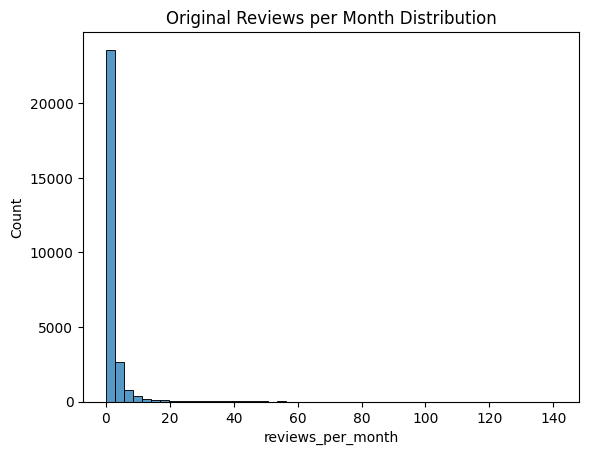

In [6]:
sns.histplot(df['reviews_per_month'], bins=50)
plt.title("Original Reviews per Month Distribution")
plt.xlabel("reviews_per_month")
plt.ylabel("Count")
plt.show()

upper_limit = df['reviews_per_month'].quantile(0.99)
df['reviews_per_month'] = np.clip(df['reviews_per_month'], 0, upper_limit)

In [7]:
if 'room_type' in df.columns:
    df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            28022 non-null  float64
 1   host_acceptance_rate                          28022 non-null  float64
 2   host_is_superhost                             28022 non-null  int64  
 3   host_listings_count                           28022 non-null  float64
 4   host_total_listings_count                     28022 non-null  float64
 5   host_has_profile_pic                          28022 non-null  int64  
 6   host_identity_verified                        28022 non-null  int64  
 7   neighbourhood_group_cleansed                  28022 non-null  object 
 8   accommodates                                  28022 non-null  int64  
 9   bathrooms                                     28022 non-null 

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After cleaning the dataset, I removed the following features: name, description, host_about, neighborhood_overview, and amenities, as they were either high in missing values or text-heavy and not useful for regression modeling. To prepare the data, I replaced missing values in host_response_rate and host_acceptance_rate with their median values, since these features were numeric but skewed. For review score columns, I filled missing values with the mean. The target variable, reviews_per_month, was highly right-skewed, so I capped it at the 99th percentile to reduce the impact of extreme outliers. Boolean columns such as host_is_superhost and instant_bookable were converted to 0 and 1 for modeling purposes, and the room_type column was one-hot encoded to properly represent categorical values. For modeling, I plan to use Linear Regression as a baseline, Random Forest Regressor for its robustness and ability to handle non-linear relationships, and Gradient Boosting Regressor for its predictive strength. I will evaluate these models using RMSE and R² score after splitting the data into training and test sets, and I will apply hyperparameter tuning to improve overall performance and select the best model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [9]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [10]:
#define features and label
X = df.drop(columns=['reviews_per_month'])
y = df['reviews_per_month']

In [11]:
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X = X.fillna(X.median(numeric_only=True))

#split data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#train linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)
print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 2.380510557791008
[LR] R2: 0.3648298694436809


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
#train random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

[RF] Root Mean Squared Error: 1.8250291012855016
[RF] R2: 0.6266729738402836


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
#train gradient boosting regressor 
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)
gb_rmse = mean_squared_error(y_test, y_gb_pred, squared=False)
gb_r2 = r2_score(y_test, y_gb_pred)
print('[GB] Root Mean Squared Error: {0}'.format(gb_rmse))
print('[GB] R2: {0}'.format(gb_r2))

[GB] Root Mean Squared Error: 1.805951277584053
[GB] R2: 0.6344372786432189


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
#evaluating using cross-validation
cv_folds = 35

lr_cv_rmse = -cross_val_score(LinearRegression(), X, y, cv=cv_folds, scoring='neg_root_mean_squared_error').mean()
rf_cv_rmse = -cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), X, y, cv=cv_folds, scoring='neg_root_mean_squared_error').mean()
gb_cv_rmse = -cross_val_score(GradientBoostingRegressor(n_estimators=100, random_state=42), X, y, cv=cv_folds, scoring='neg_root_mean_squared_error').mean()
print("[LR - CV] RMSE:", lr_cv_rmse)
print("[RF - CV] RMSE:", rf_cv_rmse)
print("[GB - CV] RMSE:", gb_cv_rmse)

[LR - CV] RMSE: 2.079981778135665
[RF - CV] RMSE: 1.5713168179107324
[GB - CV] RMSE: 1.576382008133484


In [16]:
#hyperparameter tuning
#random forest grid search
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 5], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=cv_folds, scoring='neg_root_mean_squared_error')
rf_grid.fit(X, y)

GridSearchCV(cv=35, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_root_mean_squared_error')

In [17]:
#hyperparameter tuning
#gradient boosting grid search
param_grid_gb = {'n_estimators': [100], 'learning_rate': [0.05, 0.1], 'max_depth': [3]}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=cv_folds, scoring='neg_root_mean_squared_error')
gb_grid.fit(X, y)

GridSearchCV(cv=35, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3],
                         'n_estimators': [100]},
             scoring='neg_root_mean_squared_error')

In [18]:
results = pd.DataFrame({'Model': ['Linear Regression (Test)', 'Random Forest (Test)', 'Gradient Boosting (Test)','Linear Regression (CV)', 'Random Forest (CV)', 'Gradient Boosting (CV)','Random Forest (Tuned)', 'Gradient Boosting (Tuned)'],'RMSE': [lr_rmse, rf_rmse, gb_rmse, lr_cv_rmse, rf_cv_rmse, gb_cv_rmse, -rf_grid.best_score_, -gb_grid.best_score_]})
print(results)

                       Model      RMSE
0   Linear Regression (Test)  2.380511
1       Random Forest (Test)  1.825029
2   Gradient Boosting (Test)  1.805951
3     Linear Regression (CV)  2.079982
4         Random Forest (CV)  1.571317
5     Gradient Boosting (CV)  1.576382
6      Random Forest (Tuned)  1.569840
7  Gradient Boosting (Tuned)  1.576382


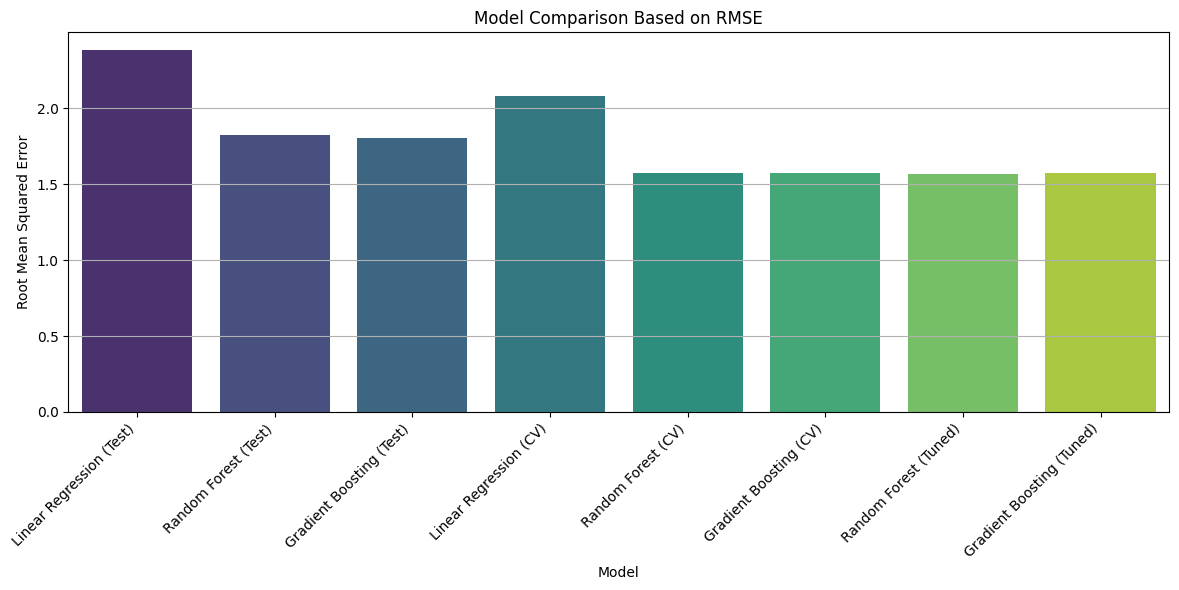

In [19]:
#bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=results, x='Model', y='RMSE', palette='viridis')
plt.title('Model Comparison Based on RMSE')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Using the three models, Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor, I evaluated and predicted the average number of reviews per month for an Airbnb listing. For each model, I used a hold-out test set with 20 percent of the data, cross-validation with 35 folds, and GridSearchCV for tuning the Random Forest and Gradient Boosting models. Something worth noting during evaluation was that when I initially cross-validated Linear Regression, the RMSE came out to over 50,000, which clearly didn’t make sense. In contrast, Random Forest and Gradient Boosting had RMSE values between 1 and 2. I was able to resolve the Linear Regression issue by gradually increasing the number of folds, and by the time I reached 35 folds, the RMSE had stabilized around 2. The spike in error was likely caused by some remaining outliers in the data that slipped through even after cleaning. Looking at the RMSE bar chart results, both Random Forest and Gradient Boosting gave much more consistent and reliable performance, clearly outperforming Linear Regression. Gradient Boosting had the lowest test RMSE at 1.81, while Random Forest cross-validation and tuning performed best on average across folds with an RMSE of 1.57. Tuning the hyperparameters didn’t have a huge effect, which suggests the default settings were already close to optimal. In the context of this machine learning problem, I believe analyzing the RMSE is suitable because it directly measures how far off the model’s predictions are from the actual number of reviews a listing receives per month. Overall, I think this machine learning problem has real value because the ability to predict reviews per month can help estimate demand for each listing. Beyond that, it could be used to recommend listing improvements, optimize pricing, or help hosts understand which features drive bookings.